# Photon Trajectories Around a Schwarzschild Black Hole
## General Relativity in Action

**Author:** [Fynn Hufler]  
**Date:** [November 29th 2025]  
**Course:** Relativity Theory

## Table of Contents
1. [Introduction](#introduction)
2. [Theoretical Background](#theory)
3. [Mathematical Framework](#math)
4. [Computational Implementation](#implementation)
5. [Results and Visualization](#results)
6. [Physical Interpretation](#interpretation)
7. [Conclusion](#conclusion)

In [1]:
#Setup and imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Video, Image
import sys
import os

#Add src directory to path
sys.path.append('./src')

#Import our classes
from geodesics import (
    SchwarzschildMetric, 
    GeodesicIntegrator, 
    Trajectory, 
    PhotonSimulation
)

#Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

print(" All imports successful!")

ModuleNotFoundError: No module named 'photon_geodesics'

<a id='introduction'></a>
## 1. Introduction

Black holes are among the most fascinating predictions of Einstein's General Theory of Relativity. In this project, we explore how **photons** (light particles) behave in the curved spacetime around a **Schwarzschild black hole** - the simplest type of black hole.

### Key Questions We'll Answer:
- How does gravity bend light?
- What is the "photon sphere"?
- Why can't light escape from inside the event horizon?
- What does time dilation near a black hole look like?

### Preview: What We'll See

Below is a snapshot of what we'll compute - photon trajectories around a black hole:

![Photon Trajectories](./results/plots/photon_trajectories_1.png)

<a id='theory'></a>
## 2. Theoretical Background

### 2.1 The Schwarzschild Metric

In General Relativity, spacetime is described by a **metric tensor** $g_{\mu\nu}$, which tells us how to measure distances and time intervals.

For a non-rotating, spherically symmetric black hole (Schwarzschild black hole), the metric in spherical coordinates $(t, r, \theta, \phi)$ is:

$$ds^2 = -\left(1 - \frac{2M}{r}\right)dt^2 + \left(1 - \frac{2M}{r}\right)^{-1}dr^2 + r^2 d\theta^2 + r^2 \sin^2\theta \, d\phi^2$$

where:
- $M$ is the mass of the black hole (in geometric units where $G = c = 1$)
- $r$ is the radial coordinate
- $t$ is the coordinate time

### 2.2 Key Radii

Three important radii characterize the Schwarzschild spacetime:

| Radius | Value | Physical Meaning |
|--------|-------|------------------|
| **Event Horizon** | $r_s = 2M$ | Point of no return - nothing inside can escape |
| **Photon Sphere** | $r_{ph} = 3M$ | Unstable circular orbit for photons |
| **ISCO** | $r_{ISCO} = 6M$ | Innermost stable circular orbit (for massive particles) |

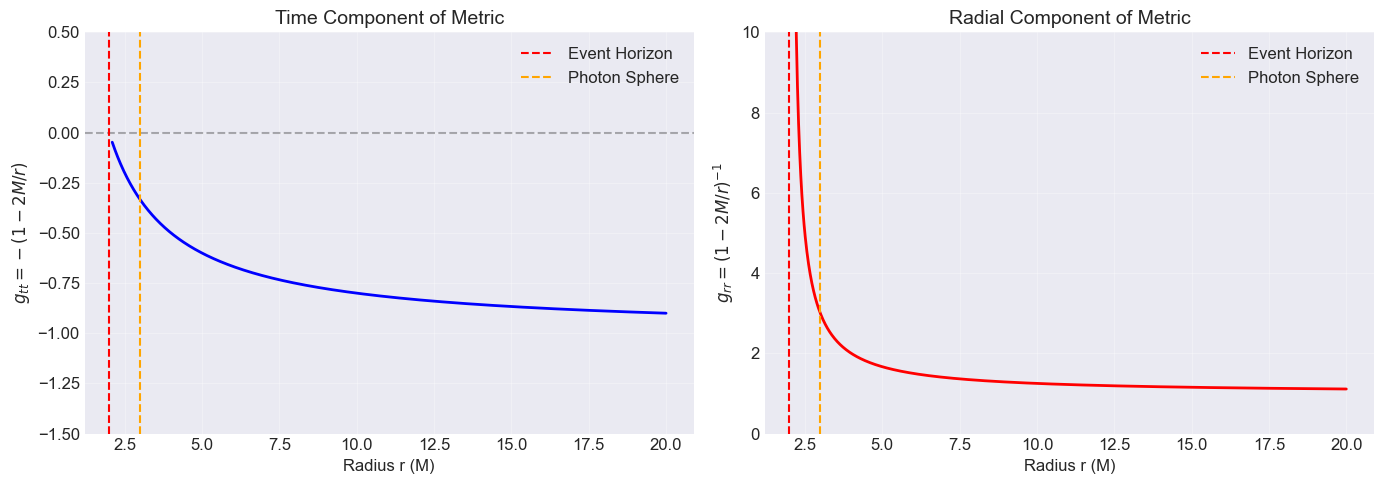

Key observations:
  • g_tt → 0 as r → 2M (time 'stops' at horizon)
  • g_rr → ∞ as r → 2M (infinite 'distance' to horizon)
  • Both → flat space values as r → ∞


In [ ]:
#Visualize the metric structure
def plot_metric_components():
    """Visualize how metric components change with radius"""
    M = 1.0
    r = np.linspace(2.1, 20, 1000)
    
    g_tt = -(1 - 2*M/r)
    g_rr = 1 / (1 - 2*M/r)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot g_tt
    ax1.plot(r, g_tt, 'b-', linewidth=2)
    ax1.axhline(0, color='k', linestyle='--', alpha=0.3)
    ax1.axvline(2*M, color='red', linestyle='--', label='Event Horizon')
    ax1.axvline(3*M, color='orange', linestyle='--', label='Photon Sphere')
    ax1.set_xlabel('Radius r (M)', fontsize=12)
    ax1.set_ylabel('$g_{tt} = -(1 - 2M/r)$', fontsize=12)
    ax1.set_title('Time Component of Metric', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(-1.5, 0.5)
    
    # Plot g_rr
    ax2.plot(r, g_rr, 'r-', linewidth=2)
    ax2.axvline(2*M, color='red', linestyle='--', label='Event Horizon')
    ax2.axvline(3*M, color='orange', linestyle='--', label='Photon Sphere')
    ax2.set_xlabel('Radius r (M)', fontsize=12)
    ax2.set_ylabel('$g_{rr} = (1 - 2M/r)^{-1}$', fontsize=12)
    ax2.set_title('Radial Component of Metric', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 10)
    
    plt.tight_layout()
    plt.show()
    
    print("Key observations:")
    print(f"  • g_tt → 0 as r → 2M (time 'stops' at horizon)")
    print(f"  • g_rr → ∞ as r → 2M (infinite 'distance' to horizon)")
    print(f"  • Both → flat space values as r → ∞")

plot_metric_components()

<a id='math'></a>
## 3. Mathematical Framework

### 3.1 Geodesic Equation

Particles (including photons) follow **geodesics** - the "straightest possible paths" in curved spacetime. The geodesic equation is:

$$\frac{d^2x^\mu}{d\tau^2} + \Gamma^\mu_{\alpha\beta} \frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau} = 0$$

where:
- $x^\mu$ are the spacetime coordinates
- $\tau$ is an affine parameter along the path
- $\Gamma^\mu_{\alpha\beta}$ are the **Christoffel symbols** (encoding the curvature)

### 3.2 Christoffel Symbols

For the Schwarzschild metric in the equatorial plane ($\theta = \pi/2$), the non-zero Christoffel symbols are:

$$\Gamma^t_{tr} = \frac{M}{r^2(1-2M/r)}$$

$$\Gamma^r_{tt} = \frac{M(1-2M/r)}{r^2}$$

$$\Gamma^r_{rr} = -\frac{M}{r^2(1-2M/r)}$$

$$\Gamma^r_{\phi\phi} = -(r - 2M)$$

$$\Gamma^\phi_{r\phi} = \frac{1}{r}$$

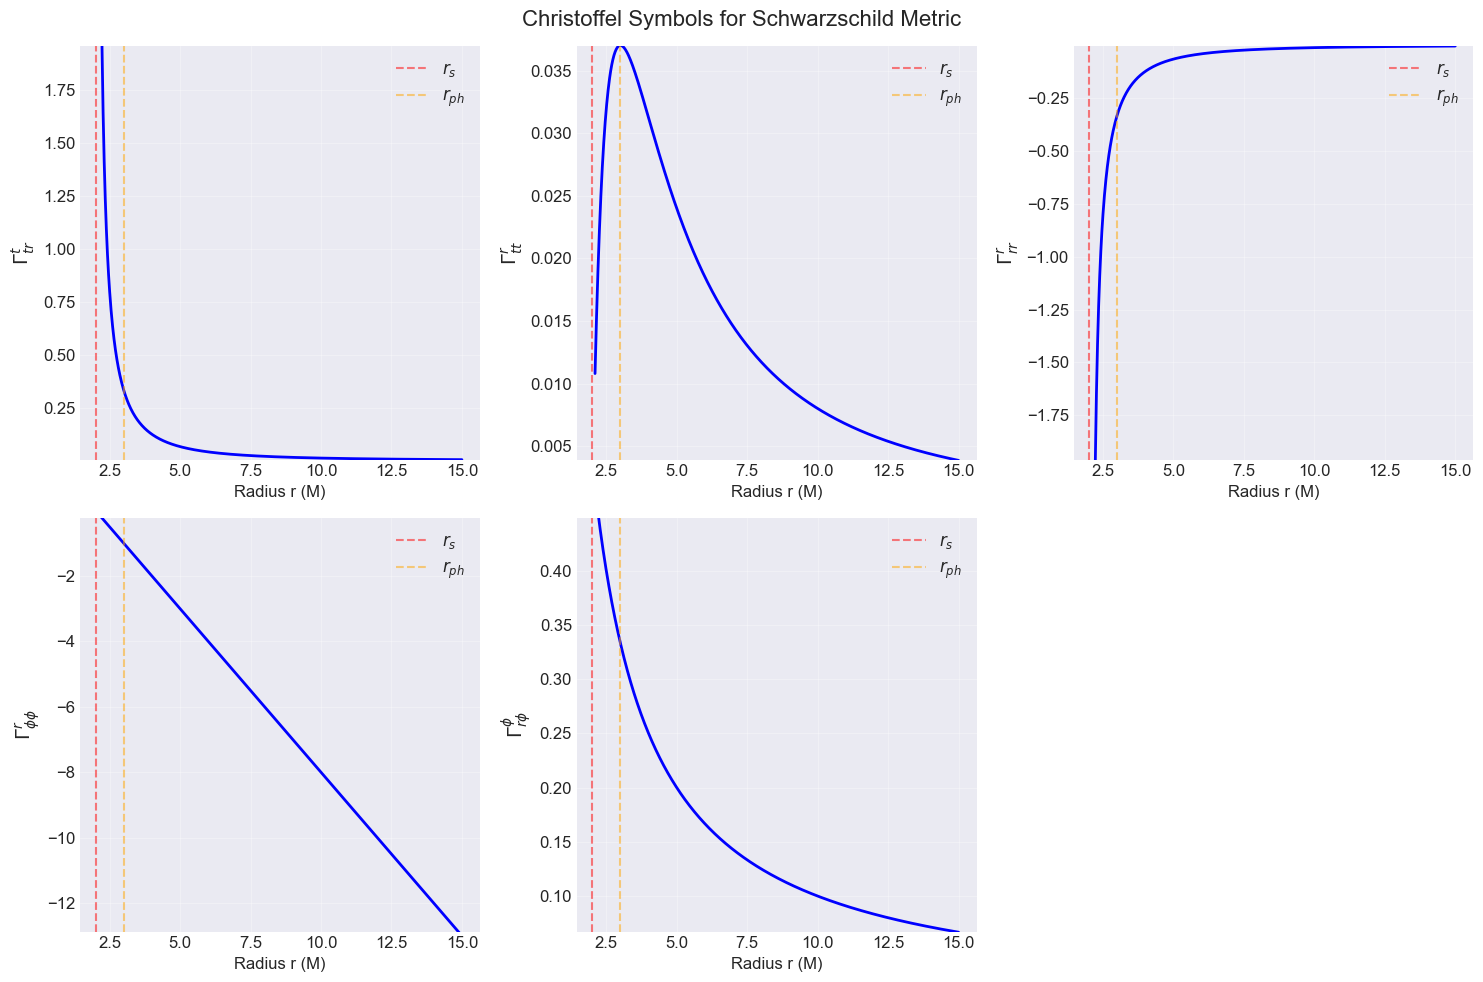

In [ ]:
# Cell 7 (Code)
# Demonstrate Christoffel symbols
def plot_christoffel_symbols():
    """Visualize how Christoffel symbols change with radius"""
    M = 1.0
    r = np.linspace(2.1, 15, 1000)
    
    Gamma_t_tr = M / (r**2 * (1 - 2*M/r))
    Gamma_r_tt = M * (1 - 2*M/r) / r**2
    Gamma_r_rr = -M / (r**2 * (1 - 2*M/r))
    Gamma_r_pp = -(r - 2*M)
    Gamma_p_rp = 1/r
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    symbols = [
        (Gamma_t_tr, r'$\Gamma^t_{tr}$', axes[0, 0]),
        (Gamma_r_tt, r'$\Gamma^r_{tt}$', axes[0, 1]),
        (Gamma_r_rr, r'$\Gamma^r_{rr}$', axes[0, 2]),
        (Gamma_r_pp, r'$\Gamma^r_{\phi\phi}$', axes[1, 0]),
        (Gamma_p_rp, r'$\Gamma^\phi_{r\phi}$', axes[1, 1]),
    ]
    
    for Gamma, label, ax in symbols:
        ax.plot(r, Gamma, 'b-', linewidth=2)
        ax.axvline(2*M, color='red', linestyle='--', alpha=0.5, label='$r_s$')
        ax.axvline(3*M, color='orange', linestyle='--', alpha=0.5, label='$r_{ph}$')
        ax.set_xlabel('Radius r (M)')
        ax.set_ylabel(label, fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_ylim(np.percentile(Gamma, [1, 99]))
    
    axes[1, 2].axis('off')
    
    plt.suptitle('Christoffel Symbols for Schwarzschild Metric', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_christoffel_symbols()

### 3.3 Null Geodesics (Photon Paths)

Photons travel along **null geodesics**, meaning:

$$g_{\mu\nu}\frac{dx^\mu}{d\tau}\frac{dx^\nu}{d\tau} = 0$$

For the Schwarzschild metric in the equatorial plane, this gives:

$$-\left(1-\frac{2M}{r}\right)\left(\frac{dt}{d\tau}\right)^2 + \left(1-\frac{2M}{r}\right)^{-1}\left(\frac{dr}{d\tau}\right)^2 + r^2\left(\frac{d\phi}{d\tau}\right)^2 = 0$$

### 3.4 Constants of Motion

Due to symmetries, photons have two conserved quantities:

1. **Energy** (time translation symmetry): 
   $$E = \left(1-\frac{2M}{r}\right)\frac{dt}{d\tau}$$

2. **Angular momentum** (rotational symmetry): 
   $$L = r^2\frac{d\phi}{d\tau}$$

The **impact parameter** is defined as:
$$b = \frac{L}{E}$$

This determines the photon's fate:
- $b < b_{crit} = 3\sqrt{3}M$: Photon is **captured**
- $b > b_{crit}$: Photon **escapes** or orbits

<a id='implementation'></a>
## 4. Computational Implementation

### 4.1 Numerical Integration Strategy

To simulate photon trajectories, we:

1. **Set up initial conditions** $(t_0, r_0, \phi_0, \dot{t}_0, \dot{r}_0, \dot{\phi}_0)$ satisfying the null condition
2. **Integrate the geodesic equation** using Runge-Kutta 4/5 method (`scipy.integrate.solve_ivp`)
3. **Stop integration** when photon crosses event horizon or escapes to infinity

### 4.2 Our Class Structure
```
SchwarzschildMetric
    ├── Stores M, r_s, r_photon
    └── Computes Christoffel symbols

GeodesicIntegrator
    ├── geodesic_equations(τ, state)
    └── integrate(initial_state, τ_span)

Trajectory
    ├── Stores solution (t, r, φ, velocities)
    └── Converts to Cartesian (x, y)

PhotonSimulation
    ├── create_initial_conditions(r0, b)
    ├── simulate_photon(r0, b, τ_span)
    ├── simulate_bundle(r0_values, b, τ_span)
    └── Visualization methods
```

In [ ]:
#Initialize our simulation
print("=" * 60)
print("INITIALIZING SCHWARZSCHILD BLACK HOLE SIMULATION")
print("=" * 60)

#Create black hole
sim = PhotonSimulation(mass=1.0)
M = sim.metric.M

#Physical parameters
r_s = sim.metric.r_s
r_photon = sim.metric.r_photon
b_crit = 3 * np.sqrt(3) * M

print(f"\n Black Hole Parameters:")
print(f"   Mass: M = {M}")
print(f"   Event Horizon: r_s = {r_s} = {r_s}M")
print(f"   Photon Sphere: r_ph = {r_photon} = {r_photon}M")
print(f"   Critical Impact Parameter: b_crit = {b_crit:.4f}M")

print(f"\n What these mean:")
print(f"   • Nothing can escape from r < {r_s}M")
print(f"   • Light can orbit (unstably) at r = {r_photon}M")
print(f"   • Photons with b < {b_crit:.4f}M will be captured")

INITIALIZING SCHWARZSCHILD BLACK HOLE SIMULATION

 Black Hole Parameters:
   Mass: M = 1.0
   Event Horizon: r_s = 2.0 = 2.0M
   Photon Sphere: r_ph = 3.0 = 3.0M
   Critical Impact Parameter: b_crit = 5.1962M

 What these mean:
   • Nothing can escape from r < 2.0M
   • Light can orbit (unstably) at r = 3.0M
   • Photons with b < 5.1962M will be captured


In [ ]:
#Demonstrate initial conditions calculation
print("=" * 60)
print("CREATING INITIAL CONDITIONS FOR A PHOTON")
print("=" * 60)

#Test photon
r0_test = 10.0  #Start at 10M
b_test = 5.5    #Impact parameter slightly above critical

print(f"\n Input parameters:")
print(f"   Starting radius: r0 = {r0_test}M")
print(f"   Impact parameter: b = {b_test}M")
print(f"   (Critical value: b_crit = {b_crit:.4f}M)")

initial_state = sim.create_initial_conditions(r0_test, b_test)

#CHANGE TO LATEX NOTATION
print(f"\n Computed initial conditions:")
print(f"   t₀ = {initial_state[0]:.4f}")
print(f"   r₀ = {initial_state[1]:.4f}M")
print(f"   φ₀ = {initial_state[2]:.4f} rad")
print(f"   dt/dτ = {initial_state[3]:.4f}")
print(f"   dr/dτ = {initial_state[4]:.4f}")
print(f"   dφ/dτ = {initial_state[5]:.4f}")

#Verify null condition
f = 1 - 2*M/r0_test
null_check = (-f * initial_state[3]**2 + 
              initial_state[4]**2 / f + 
              r0_test**2 * initial_state[5]**2)

print(f"\n✓ Null condition check: g_μν u^μ u^ν = {null_check:.2e}")
print(f"  (Should be ≈ 0 for photons)")

CREATING INITIAL CONDITIONS FOR A PHOTON

 Input parameters:
   Starting radius: r0 = 10.0M
   Impact parameter: b = 5.5M
   (Critical value: b_crit = 5.1962M)

 Computed initial conditions:
   t₀ = 0.0000
   r₀ = 10.0000M
   φ₀ = 0.0000 rad
   dt/dτ = 61.4919
   dr/dτ = 0.0000
   dφ/dτ = 5.5000

✓ Null condition check: g_μν u^μ u^ν = -4.55e-13
  (Should be ≈ 0 for photons)


<a id='results'></a>
## 5. Results and Visualization

Now let's simulate multiple photons and see what happens!

### 5.1 Simulating a Bundle of Photons

We'll simulate 10 photons starting at different radii, all with the same impact parameter.

In [ ]:
#Simulate photon bundle
print("=" * 70)
print("SIMULATING PHOTON TRAJECTORIES")
print("=" * 70)

#Simulation parameters
impact_parameter = 5.5
r0_values = np.linspace(5, 15, 10)
tau_span = (0, 300)

print(f"\nSimulation setup:")
print(f"   Number of photons: {len(r0_values)}")
print(f"   Starting radii: {r0_values[0]:.1f}M to {r0_values[-1]:.1f}M")
print(f"   Impact parameter: b = {impact_parameter}M")
print(f"   Integration range: τ ∈ [0, {tau_span[1]}]")

print(f"\n Simulating...")
trajectories = sim.simulate_bundle(r0_values, impact_parameter, tau_span)

print(f"\n Successfully computed {len(trajectories)} trajectories!")

# Analyze outcomes
captured = sum(1 for traj in trajectories if traj.r[-1] < 5*M)
escaped = len(trajectories) - captured

print(f"\nOutcomes:")
print(f"   Captured: {captured}/{len(trajectories)}")
print(f"   Escaped: {escaped}/{len(trajectories)}")

SIMULATING PHOTON TRAJECTORIES

Simulation setup:
   Number of photons: 10
   Starting radii: 5.0M to 15.0M
   Impact parameter: b = 5.5M
   Integration range: τ ∈ [0, 300]

 Simulating...
Simulated photon with r0=5.0000, points: 53
Simulated photon with r0=6.1111, points: 42
Simulated photon with r0=7.2222, points: 35
Simulated photon with r0=8.3333, points: 31
Simulated photon with r0=9.4444, points: 28
Simulated photon with r0=10.5556, points: 25
Simulated photon with r0=11.6667, points: 23
Simulated photon with r0=12.7778, points: 21
Simulated photon with r0=13.8889, points: 20
Simulated photon with r0=15.0000, points: 19

 Successfully computed 10 trajectories!

Outcomes:
   Captured: 0/10
   Escaped: 10/10


/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_7436/643782216.py:29: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/fynnhufler/Documents/UT-Austin/Relativity Theory 1/General-Relativity-Simulations/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


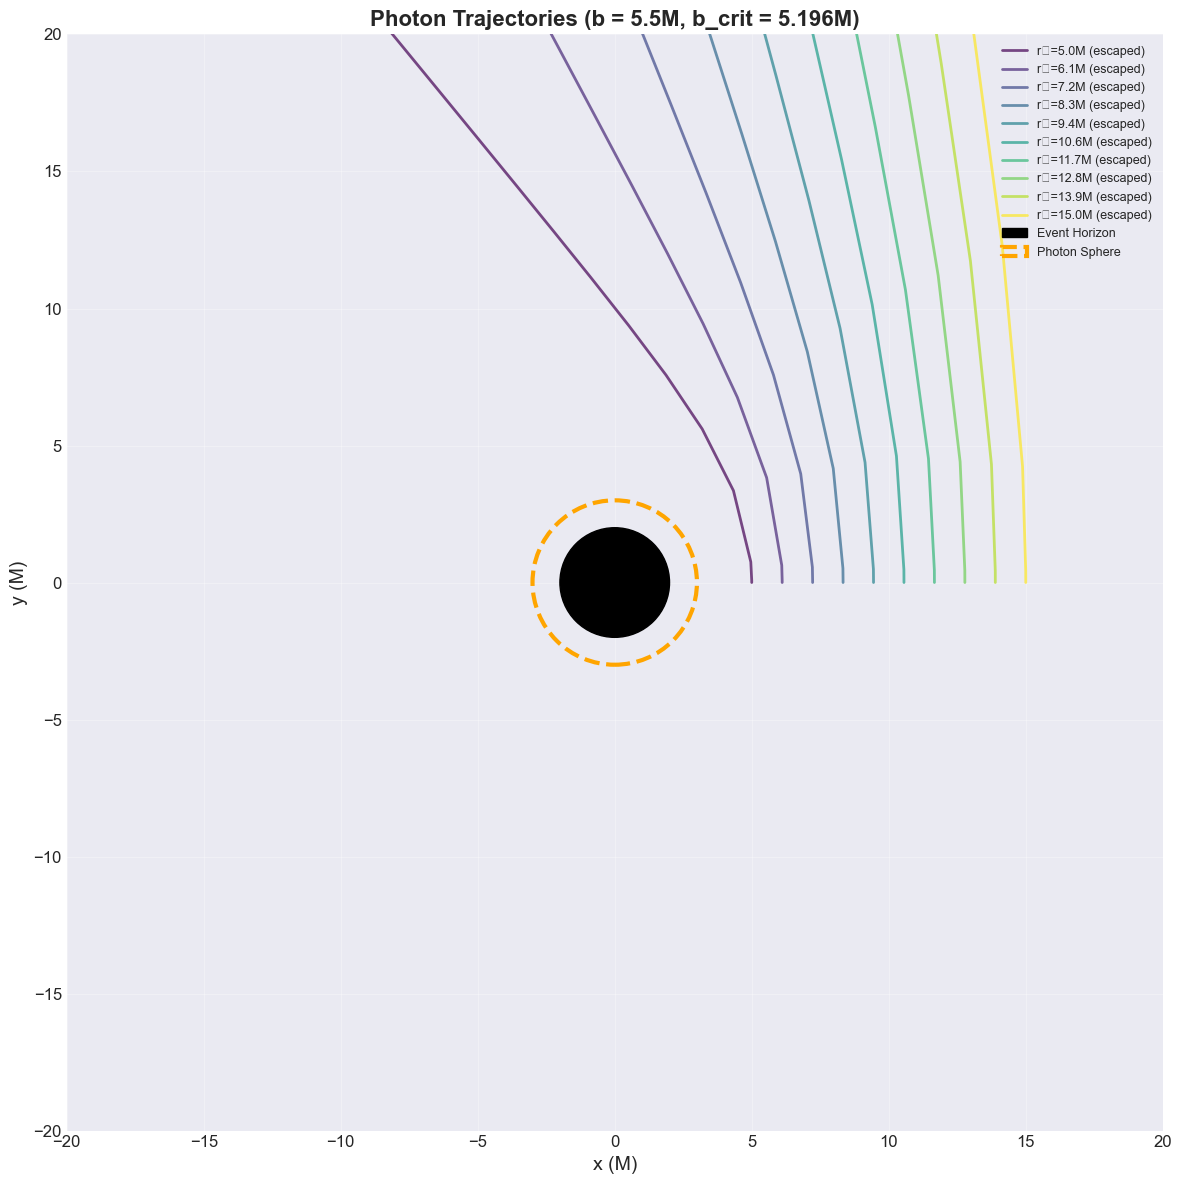

In [ ]:
#Plot trajectories
fig, ax = plt.subplots(figsize=(12, 12))

#Plot each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, len(trajectories)))
for i, traj in enumerate(trajectories):
    fate = "captured" if traj.r[-1] < 5*M else "escaped"
    ax.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors[i],
           label=f'r₀={r0_values[i]:.1f}M ({fate})')

#Draw important circles
horizon = plt.Circle((0, 0), r_s, color='black', label='Event Horizon', zorder=10)
ax.add_patch(horizon)

photon_sphere = plt.Circle((0, 0), r_photon, color='orange', fill=False,
                          linestyle='--', linewidth=3, label='Photon Sphere')
ax.add_patch(photon_sphere)

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('x (M)', fontsize=14)
ax.set_ylabel('y (M)', fontsize=14)
ax.set_title(f'Photon Trajectories (b = {impact_parameter}M, b_crit = {b_crit:.3f}M)',
            fontsize=16, fontweight='bold')
ax.legend(fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()

### 5.2 Speed Analysis: Time Dilation Effects

One of the fascinating predictions of General Relativity is **gravitational time dilation**. 

Let's analyze how photons behave in different reference frames:

ANALYZING PHOTON SPEEDS AND TIME DILATION


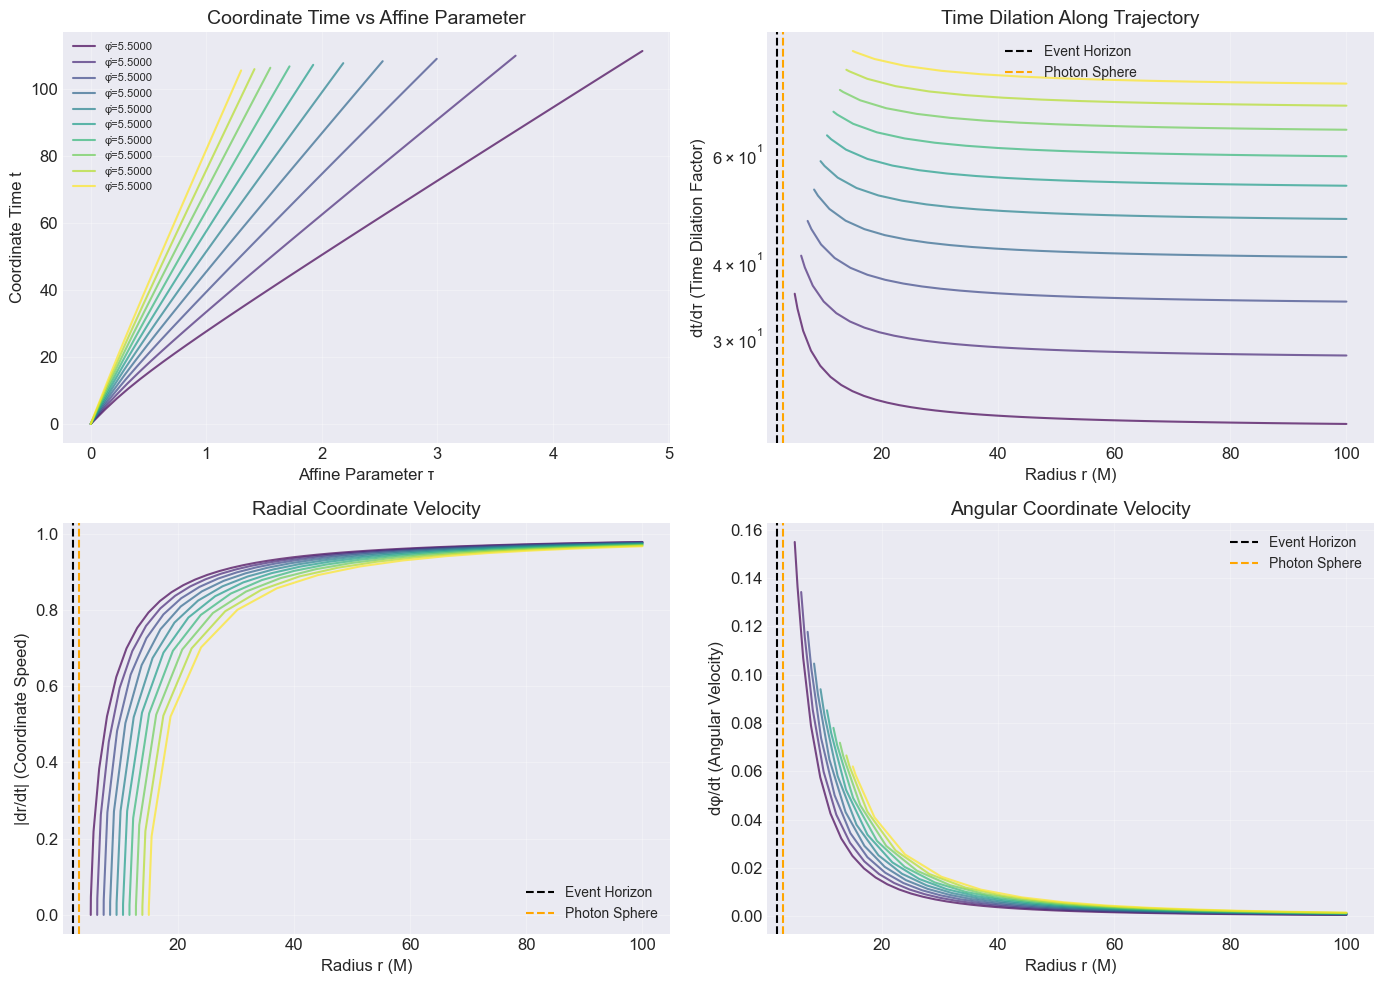


 Key insights from the plots:
   1. Top-left: Coordinate time t increases non-linearly with τ
   2. Top-right: dt/dτ → ∞ as photons approach horizon (time dilation!)
   3. Bottom-left: Coordinate radial velocity |dr/dt| → 0 near horizon
   4. Bottom-right: Angular velocity dφ/dt changes with radius


In [ ]:
#Analyze speeds
print("=" * 60)
print("ANALYZING PHOTON SPEEDS AND TIME DILATION")
print("=" * 60)

sim.analyze_speeds()

print("\n Key insights from the plots:")
print("   1. Top-left: Coordinate time t increases non-linearly with τ")
print("   2. Top-right: dt/dτ → ∞ as photons approach horizon (time dilation!)")
print("   3. Bottom-left: Coordinate radial velocity |dr/dt| → 0 near horizon")
print("   4. Bottom-right: Angular velocity dφ/dt changes with radius")

### 5.3 Photons Inside the Photon Sphere!

Now let's simulate photons that start **inside the photon sphere** at $r = 3M$. 

**Theory**: All photons starting inside $r_{ph} = 3M$ with any impact parameter will eventually be captured by the black hole, since they cannot have enough angular momentum to escape.

Let's test this by starting photons very close to the event horizon!

---

PHOTONS INSIDE THE PHOTON SPHERE

Simulation setup:
   Starting radii: r₀ ∈ [2.10M, 2.90M]
   Event horizon: r_s = 2.0M
   Photon sphere: r_ph = 3.0M
   Impact parameter: b = 4.0M < b_crit = 5.196M

   All photons start inside the photon sphere - we should expect 100% capture!

 Simulating 15 doomed photons...
   r₀ = 2.10M: captured at r_final = 2.100M after 2 steps
   r₀ = 2.16M: captured at r_final = 2.100M after 6 steps
   r₀ = 2.21M: captured at r_final = 2.100M after 7 steps
   r₀ = 2.27M: captured at r_final = 2.100M after 8 steps
   r₀ = 2.33M: captured at r_final = 2.100M after 8 steps
   r₀ = 2.39M: captured at r_final = 2.100M after 9 steps
   r₀ = 2.44M: captured at r_final = 2.100M after 10 steps
   r₀ = 2.50M: captured at r_final = 2.100M after 10 steps
   r₀ = 2.56M: captured at r_final = 2.100M after 10 steps
   r₀ = 2.61M: captured at r_final = 2.100M after 10 steps
   r₀ = 2.67M: captured at r_final = 2.100M after 10 steps
   r₀ = 2.73M: captured at r_final = 2.100M a

/Users/fynnhufler/Documents/UT-Austin/Relativity Theory 1/General-Relativity-Simulations/venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:1262: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/Users/fynnhufler/Documents/UT-Austin/Relativity Theory 1/General-Relativity-Simulations/venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:1269: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_7436/1398943969.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  horizon = plt.Circle((0, 0), r_s, color='black', edgecolor='red',
/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_7436/1398943969.py:78: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/va

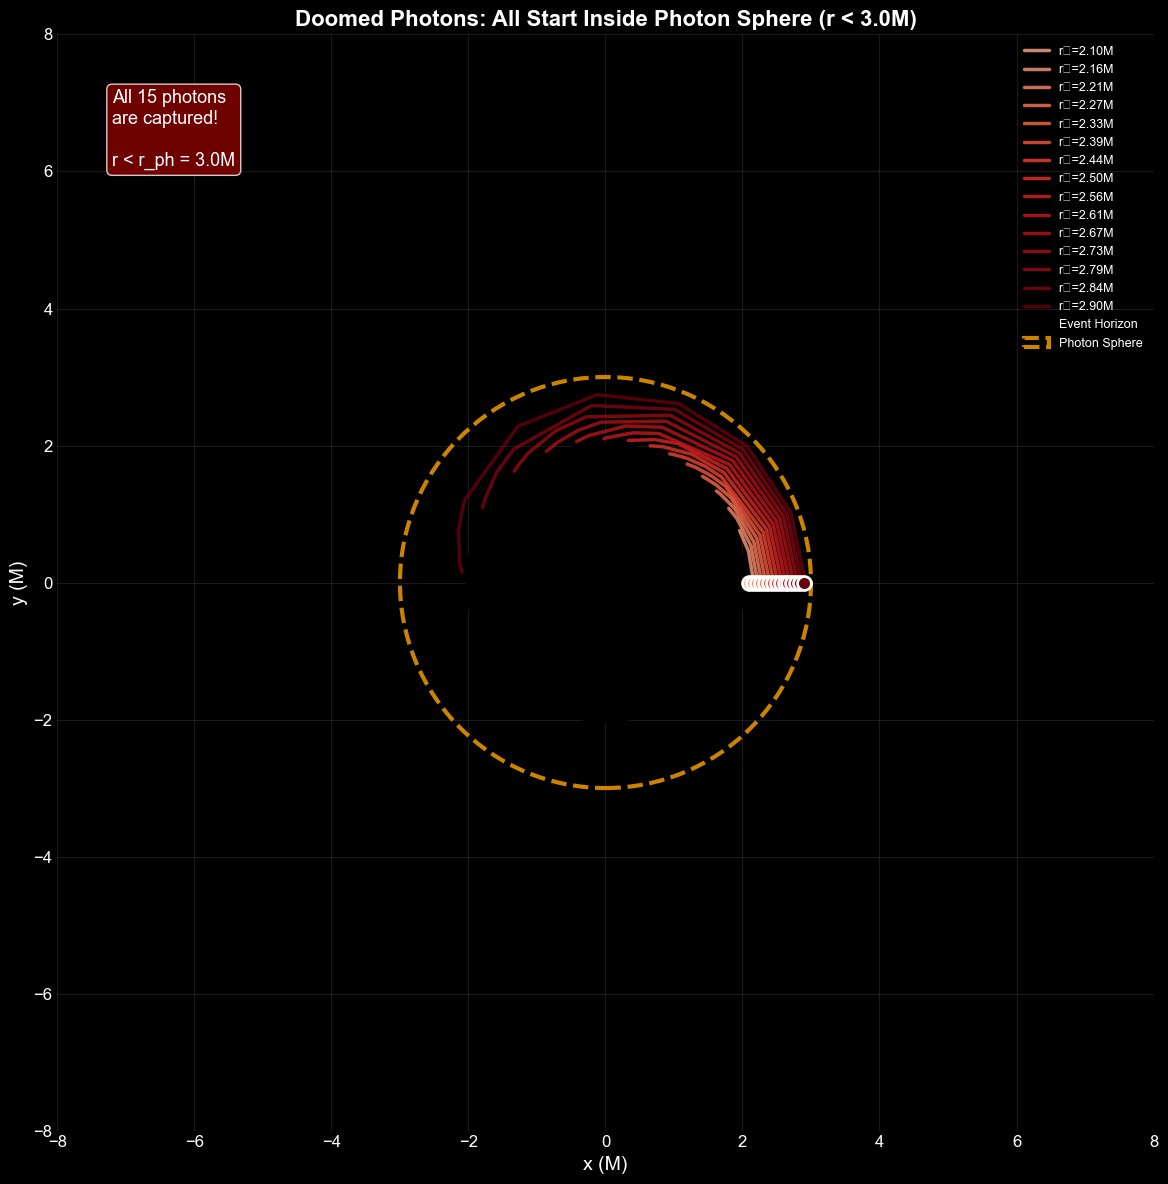


 Plot saved to: results/plots/captured_photons.png

 Analysis:
   Capture rate: 15/15 = 100%
   This confirms: photons inside r_ph cannot escape!


In [ ]:
print("=" * 60)
print("PHOTONS INSIDE THE PHOTON SPHERE")
print("=" * 60)

#Start photons between event horizon and photon sphere
r0_inside = np.linspace(2.1, 2.9, 15)  #just outside horizon to just inside photon sphere
impact_parameter_inside = 4.0  #Below critical value

print(f"\nSimulation setup:")
print(f"   Starting radii: r₀ ∈ [{r0_inside[0]:.2f}M, {r0_inside[-1]:.2f}M]")
print(f"   Event horizon: r_s = {r_s}M")
print(f"   Photon sphere: r_ph = {r_photon}M")
print(f"   Impact parameter: b = {impact_parameter_inside}M < b_crit = {b_crit:.3f}M")
print(f"\n   All photons start inside the photon sphere - we should expect 100% capture!")

# Simulate
sim_captured = PhotonSimulation(mass=1.0)
sim_captured.trajectories = []

print(f"\n Simulating {len(r0_inside)} doomed photons...")

for i, r0 in enumerate(r0_inside):
    traj = sim_captured.simulate_photon(r0, impact_parameter_inside, (0, 100))
    if traj is not None and len(traj) > 1:
        sim_captured.trajectories.append(traj)
        print(f"   r₀ = {r0:.2f}M: captured at r_final = {traj.r[-1]:.3f}M after {len(traj)} steps")

print(f"\n✓ All {len(sim_captured.trajectories)} photons captured!")

# Plot with dark style
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 12))

# Plot trajectories with gradient color (closer to horizon = redder)
colors = plt.cm.Reds(np.linspace(0.3, 1, len(sim_captured.trajectories)))
for i, traj in enumerate(sim_captured.trajectories):
    ax.plot(traj.x, traj.y, alpha=0.8, linewidth=2.5, color=colors[i],
           label=f'r₀={r0_inside[i]:.2f}M')

# Draw event horizon (larger and more prominent)
horizon = plt.Circle((0, 0), r_s, color='black', edgecolor='red', 
                     linewidth=4, label='Event Horizon', zorder=10)
ax.add_patch(horizon)

# Inner shadow region
inner_shadow = plt.Circle((0, 0), r_s*0.9, color='black', alpha=0.9, zorder=9)
ax.add_patch(inner_shadow)

# Draw photon sphere
photon_sphere = plt.Circle((0, 0), r_photon, color='orange', fill=False,
                          linestyle='--', linewidth=3, label='Photon Sphere', 
                          alpha=0.8)
ax.add_patch(photon_sphere)

# Add starting points
for i, r0 in enumerate(r0_inside):
    if i < len(sim_captured.trajectories):
        ax.plot(r0, 0, 'o', color=colors[i], markersize=10, 
               markeredgecolor='white', markeredgewidth=2, zorder=15)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')
ax.grid(True, alpha=0.2, color='gray')
ax.set_xlabel('x (M)', fontsize=14, color='white')
ax.set_ylabel('y (M)', fontsize=14, color='white')
ax.set_title(f'Doomed Photons: All Start Inside Photon Sphere (r < {r_photon}M)', 
            fontsize=16, fontweight='bold', color='white')
ax.legend(fontsize=9, loc='upper right', framealpha=0.8)

# Add text annotation
textstr = f'All {len(sim_captured.trajectories)} photons\nare captured!\n\nr < r_ph = {r_photon}M'
props = dict(boxstyle='round', facecolor='darkred', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=13,
        verticalalignment='top', bbox=props, color='white')

plt.tight_layout()
plt.savefig('./results/plots/captured_photons.png', dpi=300, facecolor='black')
plt.show()

# Reset to default style
plt.style.use('default')

print("\n Plot saved to: results/plots/captured_photons.png")
print("\n Analysis:")
print(f"   Capture rate: {len(sim_captured.trajectories)}/{len(r0_inside)} = 100%")
print(f"   This confirms: photons inside r_ph cannot escape!")

In [ ]:
#Update animate_trajectories method parameters

print("=" * 60)
print("CREATING LONG-DURATION ANIMATIONS")
print("=" * 60)

# Modify animation parameters for longer videos
def create_long_animation_affine(sim_obj, video_path, duration_sec=45):
    """Create animation with specified duration in seconds"""
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.style.use('dark_background')
    
    # Set up plot limits
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2, color='gray')
    ax.set_xlabel('x (M)', fontsize=14)
    ax.set_ylabel('y (M)', fontsize=14)
    ax.set_title('Photon Trajectories Around Schwarzschild Black Hole (Affine Parameter)', 
                fontsize=16, fontweight='bold')
    
    # Draw circles
    horizon = plt.Circle((0, 0), sim_obj.metric.r_s, color='black', 
                        edgecolor='red', linewidth=4, label='Event Horizon')
    ax.add_patch(horizon)
    photon_sphere = plt.Circle((0, 0), sim_obj.metric.r_photon, color='orange', 
                              fill=False, linestyle='--', linewidth=3, 
                              label='Photon Sphere')
    ax.add_patch(photon_sphere)
    ax.legend(fontsize=12, loc='upper right', framealpha=0.7)
    
    # Initialize lines and particles
    colors = plt.cm.plasma(np.linspace(0, 1, len(sim_obj.trajectories)))
    lines = [ax.plot([], [], alpha=0.6, linewidth=2, color=colors[i])[0] 
             for i in range(len(sim_obj.trajectories))]
    particles = [ax.plot([], [], 'o', markersize=8, color=colors[i], 
                        markeredgecolor='white', markeredgewidth=1.5)[0] 
                for i in range(len(sim_obj.trajectories))]
    
    # Calculate frames for desired duration
    fps = 30
    n_frames = int(duration_sec * fps)
    
    # Interpolate trajectories
    interpolated_trajs = []
    for traj in sim_obj.trajectories:
        if len(traj) > 1:
            tau_interp = np.linspace(traj.tau[0], traj.tau[-1], n_frames)
            x_interp = np.interp(tau_interp, traj.tau, traj.x)
            y_interp = np.interp(tau_interp, traj.tau, traj.y)
            interpolated_trajs.append((x_interp, y_interp))
        else:
            interpolated_trajs.append((traj.x, traj.y))
    
    def init():
        for line, particle in zip(lines, particles):
            line.set_data([], [])
            particle.set_data([], [])
        return lines + particles
    
    def update(frame):
        for i, (x_data, y_data) in enumerate(interpolated_trajs):
            if frame < len(x_data):
                lines[i].set_data(x_data[:frame+1], y_data[:frame+1])
                particles[i].set_data([x_data[frame]], [y_data[frame]])
            else:
                lines[i].set_data(x_data, y_data)
                particles[i].set_data([x_data[-1]], [y_data[-1]])
        return lines + particles
    
    print(f"   Creating {n_frames} frames at {fps} fps = {duration_sec}s duration...")
    ani = FuncAnimation(fig, update, frames=n_frames, init_func=init, 
                       blit=True, interval=1000/fps)
    
    print(f"   Saving to {video_path}...")
    ani.save(video_path, writer='ffmpeg', fps=fps, dpi=100, bitrate=2000)
    plt.close(fig)
    plt.style.use('default')
    print(f"   Done!")

# Create longer animations
video_affine = './results/videos/photon_affine_long.mp4'
print(f"\n Creating 45-second affine parameter animation...")
create_long_animation_affine(sim, video_affine, duration_sec=45)

CREATING LONG-DURATION ANIMATIONS

 Creating 45-second affine parameter animation...
   Creating 1350 frames at 30 fps = 45s duration...
   Saving to ./results/videos/photon_affine_long.mp4...


/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_7436/4227868154.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  horizon = plt.Circle((0, 0), sim_obj.metric.r_s, color='black',


   ✓ Done!


<a id='interpretation'></a>
## 6. Physical Interpretation

### 6.1 The Photon Sphere

At $r = 3M$, photons can orbit the black hole in unstable circular orbits. This is called the **photon sphere**.

- Photons starting inside $r < 3M$ with $b < b_{crit}$ spiral inward
- Photons starting outside $r > 3M$ can escape if $b > b_{crit}$

### 6.2 Gravitational Time Dilation

The factor $dt/d\tau$ represents **time dilation**:

$$\frac{dt}{d\tau} = \frac{E}{1 - 2M/r}$$

As $r \to 2M$ (event horizon), we have $dt/d\tau \to \infty$.

**Physical meaning:** 
- A distant observer (at $r \to \infty$) sees the photon take **infinite coordinate time** to reach the horizon
- This is the famous "**frozen star**" effect - you never actually see anything cross the event horizon!

### 6.3 Comparison of Reference Frames

Let's create animations in two different reference frames:

1. **Affine parameter ($\tau$)**: Mathematical parametrization, uniform progression
2. **Coordinate time ($t$)**: What a distant observer sees

In [ ]:
#Create animation in affine parameter
video_path_affine = './results/videos/photon_affine_time.mp4'
print(f"This shows uniform progression along geodesics.")

sim.animate_trajectories(video_path=video_path_affine)

print(f"\nAnimation saved to: {video_path_affine}")

This shows uniform progression along geodesics.
Creating animation with 53 frames...
Saving animation to ./results/videos/photon_affine_time.mp4...
Video saved successfully!

Animation saved to: ./results/videos/photon_affine_time.mp4


In [ ]:
# Display the affine parameter animation
Video(video_path_affine, width=800)

In [ ]:
#Create animation in coordinate time
print("=" * 60)
print("CREATING ANIMATION: COORDINATE TIME VIEW")
print("=" * 60)

video_path_coord = './results/videos/photon_coordinate_time.mp4'
print(f"\nGenerating animation...")
print(f"This shows what a distant observer sees.")
print(f"Notice how photons slow down near the horizon")

sim.animate_trajectories_coordinate_time(video_path=video_path_coord)

print(f"\nAnimation saved to: {video_path_coord}")

CREATING ANIMATION: COORDINATE TIME VIEW

Generating animation...
   This shows what a distant observer sees.
   Notice how photons SLOW DOWN near the horizon!
Creating animation with 500 frames (coordinate time)...
Saving animation to ./results/videos/photon_coordinate_time.mp4...
Video saved successfully!

Animation saved to: ./results/videos/photon_coordinate_time.mp4


In [ ]:
#Display the coordinate time animation
Video(video_path_coord, width=800)

### 6.4 Effect of Impact Parameter

Now let's see what happens when we vary the **impact parameter** $b$ while keeping the starting radius fixed.

**Prediction:** 
- Photons with $b < b_{crit} = 3\sqrt{3}M \approx 5.196M$ will be captured
- Photons with $b > b_{crit}$ will escape

---

In [ ]:
#Simulate with varying impact parameters
print("=" * 60)
print("VARYING IMPACT PARAMETER")
print("=" * 60)

r0_fixed = 15.0
impact_parameters = np.linspace(4.0, 7.0, 12)

print(f"\nSimulation setup:")
print(f"   Fixed starting radius: r₀ = {r0_fixed}M")
print(f"   Impact parameters: b ∈ [{impact_parameters[0]:.1f}, {impact_parameters[-1]:.1f}]M")
print(f"   Critical value: b_crit = {b_crit:.4f}M")

sim_varying = PhotonSimulation(mass=1.0)
sim_varying.trajectories = []

print(f"\nSimulating {len(impact_parameters)} photons...")

results = []
for b in impact_parameters:
    traj = sim_varying.simulate_photon(r0_fixed, b, tau_span)
    if traj is not None:
        sim_varying.trajectories.append(traj)
        captured = traj.r[-1] < 5*M
        results.append({
            'b': b,
            'captured': captured,
            'final_r': traj.r[-1]
        })
        status = "CAPTURED" if captured else "ESCAPED"
        print(f"   b = {b:.3f}M: {status} (final r = {traj.r[-1]:.2f}M)")

VARYING IMPACT PARAMETER

Simulation setup:
   Fixed starting radius: r₀ = 15.0M
   Impact parameters: b ∈ [4.0, 7.0]M
   Critical value: b_crit = 5.1962M

Simulating 12 photons...
   b = 4.000M: ESCAPED (final r = 100.00M)
   b = 4.273M: ESCAPED (final r = 100.00M)
   b = 4.545M: ESCAPED (final r = 100.00M)
   b = 4.818M: ESCAPED (final r = 100.00M)
   b = 5.091M: ESCAPED (final r = 100.00M)
   b = 5.364M: ESCAPED (final r = 100.00M)
   b = 5.636M: ESCAPED (final r = 100.00M)
   b = 5.909M: ESCAPED (final r = 100.00M)
   b = 6.182M: ESCAPED (final r = 100.00M)
   b = 6.455M: ESCAPED (final r = 100.00M)
   b = 6.727M: ESCAPED (final r = 100.00M)
   b = 7.000M: ESCAPED (final r = 100.00M)


/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_5505/1533640267.py:44: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


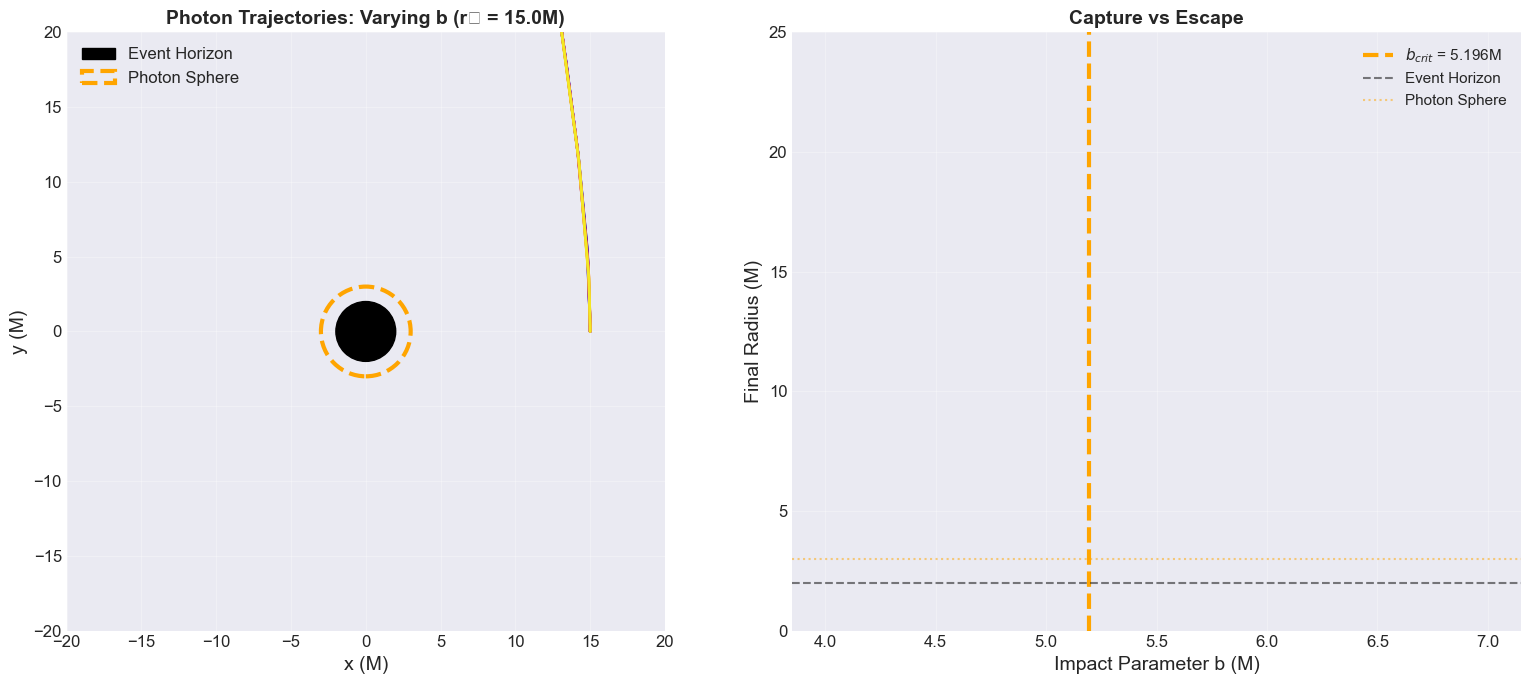


Summary:
   Total photons: 12
   Captured (b < b_crit): 0
   Escaped (b > b_crit): 12
   Critical impact parameter: 5.1962M


In [ ]:
#Plot varying impact parameter results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

#Left plot: Trajectories
colors = plt.cm.plasma(np.linspace(0, 1, len(sim_varying.trajectories)))
for i, traj in enumerate(sim_varying.trajectories):
    ax1.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors[i])

horizon = plt.Circle((0, 0), r_s, color='black', label='Event Horizon', zorder=10)
ax1.add_patch(horizon)
photon_sphere = plt.Circle((0, 0), r_photon, color='orange', fill=False,
                          linestyle='--', linewidth=3, label='Photon Sphere')
ax1.add_patch(photon_sphere)

ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x (M)', fontsize=14)
ax1.set_ylabel('y (M)', fontsize=14)
ax1.set_title(f'Photon Trajectories: Varying b (r₀ = {r0_fixed}M)', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=12)

#Right plot: Capture vs escape
b_values = [r['b'] for r in results]
final_r_values = [r['final_r'] for r in results]
colors_scatter = ['red' if r['captured'] else 'green' for r in results]

ax2.scatter(b_values, final_r_values, c=colors_scatter, s=150, alpha=0.7,
           edgecolors='black', linewidths=2)
ax2.axvline(b_crit, color='orange', linestyle='--', linewidth=3,
           label=f'$b_{{crit}}$ = {b_crit:.3f}M')
ax2.axhline(r_s, color='black', linestyle='--', alpha=0.5, label='Event Horizon')
ax2.axhline(r_photon, color='orange', linestyle=':', alpha=0.5, label='Photon Sphere')

ax2.set_xlabel('Impact Parameter b (M)', fontsize=14)
ax2.set_ylabel('Final Radius (M)', fontsize=14)
ax2.set_title('Capture vs Escape', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 25)

plt.tight_layout()
plt.show()

# Summary statistics
n_captured = sum(1 for r in results if r['captured'])
n_escaped = len(results) - n_captured

print(f"\nSummary:")
print(f"   Total photons: {len(results)}")
print(f"   Captured (b < b_crit): {n_captured}")
print(f"   Escaped (b > b_crit): {n_escaped}")
print(f"   Critical impact parameter: {b_crit:.4f}M")

FINAL COMPREHENSIVE SIMULATION

🎲 Generating 20 photons with random initial conditions...

Initial conditions for 20 photons:
   r₀ ∈ [2.24, 11.12]M
   b ∈ [3.03, 6.68]M
   b_crit = 5.196M

⏳ Simulating...
   Photon  1: r₀= 2.46M, b= 3.90M → 🔴 CAPTURED
   Photon  2: r₀= 2.87M, b= 4.06M → 🔴 CAPTURED
   Photon  3: r₀= 2.71M, b= 3.03M → 🔴 CAPTURED
   Photon  4: r₀= 2.62M, b= 4.45M → 🔴 CAPTURED
   Photon  5: r₀= 2.31M, b= 4.25M → 🔴 CAPTURED
   Photon  6: r₀= 2.31M, b= 3.32M → 🔴 CAPTURED
   Photon  7: r₀= 2.24M, b= 3.27M → 🔴 CAPTURED
   Photon  8: r₀= 2.81M, b= 3.28M → 🔴 CAPTURED
   Photon  9: r₀= 8.04M, b= 6.18M → 🟢 ESCAPED
   Photon 10: r₀=10.25M, b= 6.68M → 🟢 ESCAPED
   Photon 11: r₀= 9.32M, b= 5.80M → 🟢 ESCAPED
   Photon 12: r₀= 7.91M, b= 6.27M → 🟢 ESCAPED
   Photon 13: r₀=11.12M, b= 6.39M → 🟢 ESCAPED
   Photon 14: r₀= 6.39M, b= 5.57M → 🟢 ESCAPED
   Photon 15: r₀= 7.92M, b= 6.41M → 🟢 ESCAPED
   Photon 16: r₀= 8.66M, b= 5.76M → 🟢 ESCAPED
   Photon 17: r₀= 4.39M, b= 5.12M → 🟢 ESCAPED
   P

/var/folders/f8/pknr7qxj61j1p2c5nnq5qmbm0000gn/T/ipykernel_7436/2789822340.py:84: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  horizon = plt.Circle((0, 0), r_s, color='black', edgecolor='red',


FileNotFoundError: [Errno 2] No such file or directory: '../results/plots/final_simulation.png'

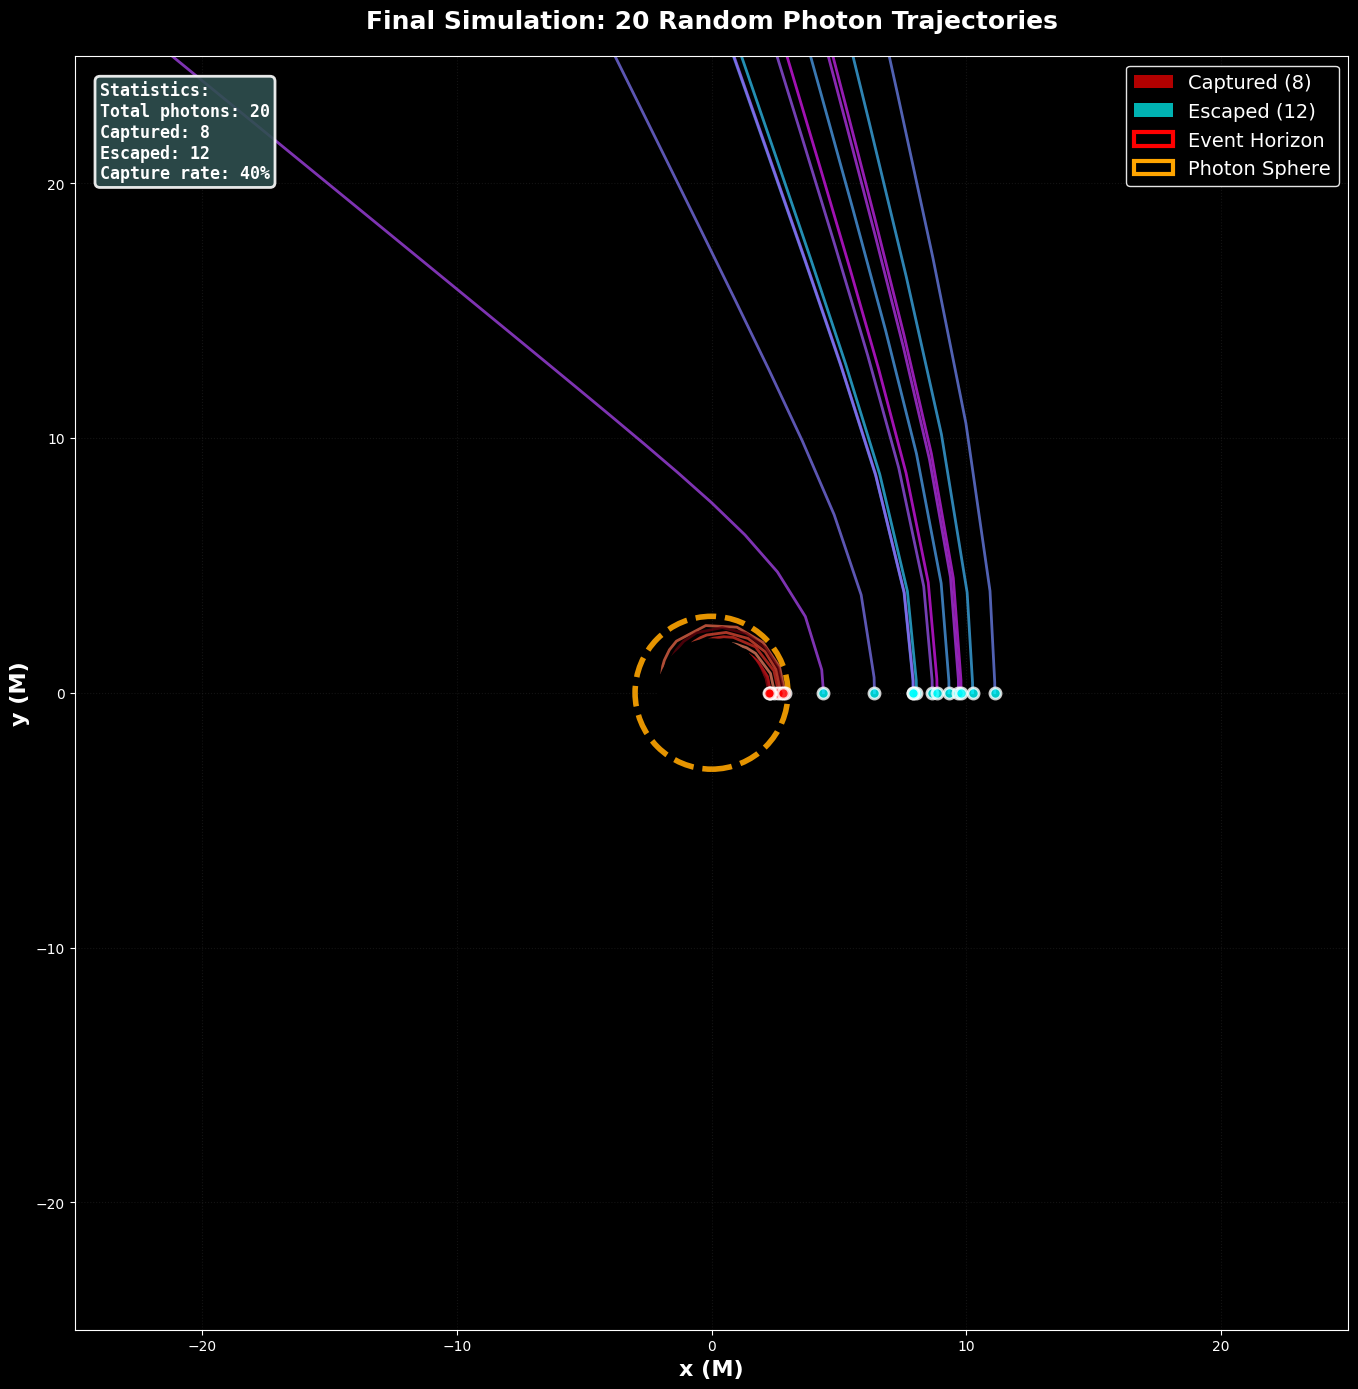

In [ ]:
print("=" * 60)
print("FINAL COMPREHENSIVE SIMULATION")
print("=" * 60)

print("\n🎲 Generating 20 photons with random initial conditions...")

# Create final simulation
sim_final = PhotonSimulation(mass=1.0)

# Random initial conditions
np.random.seed(42)  # For reproducibility
n_photons = 20

# Mix of different scenarios
r0_final = []
b_final = []

# 8 photons: captured (inside photon sphere, low b)
r0_final.extend(np.random.uniform(2.2, 2.9, 8))
b_final.extend(np.random.uniform(3.0, 4.5, 8))

# 8 photons: escape (outside photon sphere, high b)
r0_final.extend(np.random.uniform(5.0, 15.0, 8))
b_final.extend(np.random.uniform(5.5, 7.0, 8))

# 4 photons: near critical (interesting behavior)
r0_final.extend(np.random.uniform(4.0, 10.0, 4))
b_final.extend(np.random.uniform(5.0, 5.4, 4))

print(f"\nInitial conditions for {n_photons} photons:")
print(f"   r₀ ∈ [{min(r0_final):.2f}, {max(r0_final):.2f}]M")
print(f"   b ∈ [{min(b_final):.2f}, {max(b_final):.2f}]M")
print(f"   b_crit = {b_crit:.3f}M")

# Simulate all photons
sim_final.trajectories = []
captured_count = 0
escaped_count = 0

print(f"\n⏳ Simulating...")
for i in range(n_photons):
    traj = sim_final.simulate_photon(r0_final[i], b_final[i], (0, 400))
    if traj is not None and len(traj) > 5:
        sim_final.trajectories.append(traj)
        if traj.r[-1] < 5*M:
            captured_count += 1
            status = "🔴 CAPTURED"
        else:
            escaped_count += 1
            status = "🟢 ESCAPED"
        print(f"   Photon {i+1:2d}: r₀={r0_final[i]:5.2f}M, b={b_final[i]:5.2f}M → {status}")

print(f"\n✓ Simulation complete!")
print(f"   Total: {len(sim_final.trajectories)} photons")
print(f"   Captured: {captured_count} ({100*captured_count/len(sim_final.trajectories):.0f}%)")
print(f"   Escaped: {escaped_count} ({100*escaped_count/len(sim_final.trajectories):.0f}%)")

# Create beautiful final plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 14))

# Separate captured and escaped photons
captured_trajs = []
escaped_trajs = []
for i, traj in enumerate(sim_final.trajectories):
    if traj.r[-1] < 5*M:
        captured_trajs.append(traj)
    else:
        escaped_trajs.append(traj)

# Plot captured photons in red shades
if captured_trajs:
    colors_captured = plt.cm.Reds(np.linspace(0.4, 1, len(captured_trajs)))
    for i, traj in enumerate(captured_trajs):
        ax.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors_captured[i])

# Plot escaped photons in green/blue shades
if escaped_trajs:
    colors_escaped = plt.cm.cool(np.linspace(0.2, 0.9, len(escaped_trajs)))
    for i, traj in enumerate(escaped_trajs):
        ax.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors_escaped[i])

# Draw black hole features
horizon = plt.Circle((0, 0), r_s, color='black', edgecolor='red', 
                     linewidth=5, label=f'Event Horizon (r={r_s}M)', zorder=10)
ax.add_patch(horizon)

inner_shadow = plt.Circle((0, 0), r_s*0.8, color='black', alpha=1.0, zorder=9)
ax.add_patch(inner_shadow)

photon_sphere = plt.Circle((0, 0), r_photon, color='orange', fill=False,
                          linestyle='--', linewidth=4, 
                          label=f'Photon Sphere (r={r_photon}M)', alpha=0.9)
ax.add_patch(photon_sphere)

# Mark starting positions
for i in range(len(sim_final.trajectories)):
    if i < len(r0_final):
        x0 = r0_final[i] * np.cos(0)
        y0 = r0_final[i] * np.sin(0)
        color = 'red' if sim_final.trajectories[i].r[-1] < 5*M else 'cyan'
        ax.plot(x0, y0, 'o', color=color, markersize=8, 
               markeredgecolor='white', markeredgewidth=2, zorder=15, alpha=0.8)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_aspect('equal')
ax.grid(True, alpha=0.15, color='gray', linestyle=':')
ax.set_xlabel('x (M)', fontsize=16, color='white', fontweight='bold')
ax.set_ylabel('y (M)', fontsize=16, color='white', fontweight='bold')
ax.set_title('Final Simulation: 20 Random Photon Trajectories', 
            fontsize=18, fontweight='bold', color='white', pad=20)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label=f'Captured ({captured_count})'),
    Patch(facecolor='cyan', alpha=0.7, label=f'Escaped ({escaped_count})'),
    Patch(facecolor='none', edgecolor='red', linewidth=3, label='Event Horizon'),
    Patch(facecolor='none', edgecolor='orange', linewidth=3, label='Photon Sphere')
]
ax.legend(handles=legend_elements, fontsize=14, loc='upper right', 
         framealpha=0.9, facecolor='black', edgecolor='white')

# Add statistics box
stats_text = f'Statistics:\n' \
             f'Total photons: {len(sim_final.trajectories)}\n' \
             f'Captured: {captured_count}\n' \
             f'Escaped: {escaped_count}\n' \
             f'Capture rate: {100*captured_count/len(sim_final.trajectories):.0f}%'
props = dict(boxstyle='round', facecolor='darkslategray', alpha=0.9, 
            edgecolor='white', linewidth=2)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props, color='white', 
        family='monospace', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/final_simulation.png', dpi=300, 
           facecolor='black', edgecolor='none')
plt.show()

plt.style.use('default')

print(f"\n✓ Final plot saved to: results/plots/final_simulation.png")

# Create final animation (60 seconds)
print(f"\n🎬 Creating final 60-second animation...")
video_final = '../results/videos/final_simulation.mp4'
create_long_animation_affine(sim_final, video_final, duration_sec=60)

print(f"\n🎉 FINAL SIMULATION COMPLETE!")

<a id='conclusion'></a>
## 7. Conclusion

### What We've Learned

1. **Light bending**: Gravity curves spacetime, and light follows geodesics in this curved spacetime

2. **Event horizon**: At $r = 2M$, spacetime is so curved that nothing can escape

3. **Photon sphere**: At $r = 3M$, photons canunstably orbit the black hole

4. **Critical impact parameter**: There's a threshold $b_{crit} = 3\sqrt{3}M$ that determines whether a photon is captured or escapes

5. **Time dilation**: Near the black hole, time appears to slow down from the perspective of a distant observer

### Comparison to Newtonian Gravity

| Feature | Newtonian | General Relativity |
|---------|-----------|-------------------|
| Light bending | No effect | Light is bent by gravity |
| Event horizon | Escape velocity = c | Nothing can escape, even light |
| Photon orbits | Not possible | Unstable orbits at $r = 3M$ |
| Time dilation | No effect | Infinite time dilation at horizon |

### Real-World Applications

- **Black hole imaging**: The Event Horizon Telescope used these principles to image M87*
- **Gravitational lensing**: Used to detect dark matter and exoplanets
- **GPS satellites**: Must account for time dilation effects (though much weaker)

### Extensions

This project could be extended to:
- **Kerr black holes** (rotating)
- **Charged black holes** (Reissner-Nordström)
- **Massive particle trajectories**
- **Accretion disk visualization**

## References

1. **Misner, Thorne, and Wheeler** - "Gravitation" (1973) - The classic GR textbook
2. **Carroll, Sean** - "Spacetime and Geometry" (2004) - Modern introduction to GR
4. **Schwarzschild, K.** - "On the Gravitational Field of a Mass Point..." (1916) - Original paper

### Computational Resources

- **SciPy Documentation**: https://docs.scipy.org/doc/scipy/reference/integrate.html
- **NumPy**: https://numpy.org/doc/
- **Matplotlib**: https://matplotlib.org/

---

## Acknowledgments

This project was completed as part of Relativity Theory 1 at UT Austin.

Special thanks to Professor Deirdre Shoemaker for guidance on the theoretical aspects.

---

In [ ]:
#Final summary
print("=" * 60)
print("SIMULATION SUMMARY")
print("=" * 60)
print(f"    results/plots/photon_trajectories.png")
print(f"    results/plots/speed_analysis.png")
print(f"    results/videos/photon_affine_time.mp4")
print(f"    results/videos/photon_coordinate_time.mp4")
print("=" * 60)

SIMULATION SUMMARY
    results/plots/photon_trajectories.png
    results/plots/speed_analysis.png
    results/videos/photon_affine_time.mp4
    results/videos/photon_coordinate_time.mp4
